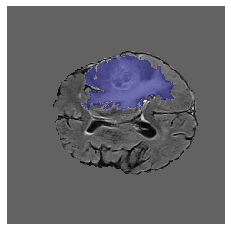

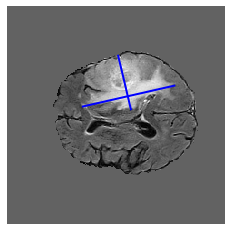

In [14]:
# ground truth segmentation and RANO with a FLAIR channel input as background

import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
from matplotlib import pyplot as plt

example = "Brats18_CBICA_AQT_1"

path1 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whseg_norm.nii.gz"
path2 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whimg_norm.nii.gz"
data = np.load("Brats_2018_data/Brats_2018_data/HGG/" + example + "/" + example + "_RANO.npz")

slice_val = 80
channel_number = 1

img = nib.load(path1)
data1 = img.get_fdata()
data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan

img = nib.load(path2)
data2 = img.get_fdata()

plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.imshow((data1[:,:,slice_val]), cmap='jet', interpolation='nearest',alpha=0.5)
plt.grid(None) 
plt.axis('off')
plt.show()

#############################################################################################
#                                   segmentation ^ RANO v                                   #
#############################################################################################

lst = data.files
for item in lst:
    data_in = data[item][:,slice_val]

plt.grid(False)
plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.grid(None) 
plt.axis('off')

D1 = np.asarray([[data_in[1],data_in[3]],[data_in[0],data_in[2]]]) 
D2 = np.asarray([[data_in[5],data_in[7]],[data_in[4],data_in[6]]]) 

plt.plot(D1[0, :], D1[1, :], lw=2, c='b',label='_nolegend_')
plt.plot(D2[0, :], D2[1, :], lw=2, c='b',label='Prediction')

plt.show()


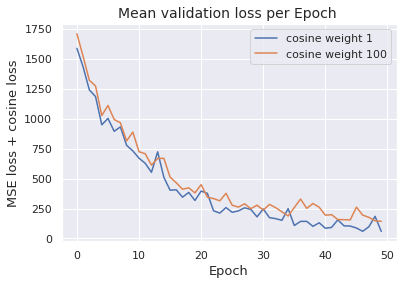

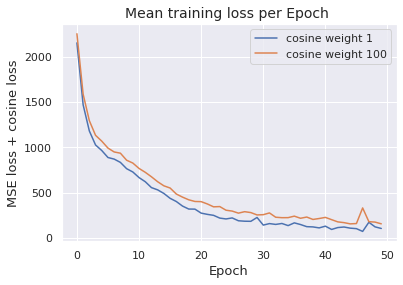

In [8]:
# RANO output loss for both training and validation - over differing penalty types

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["cosine weight 1", "cosine weight 100"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss","MSE loss + cosine loss"]
output_title = ["validation loss","training loss"
second_out = ["Validation_loss","Training_loss"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    ax = plt.subplot()
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=14)
    ax.legend(legend_names,fontsize=11)
    plt.xlabel("Epoch",fontsize=13)
    plt.ylabel(ylabel=output_axis[c],fontsize=13)
    plt.show()    

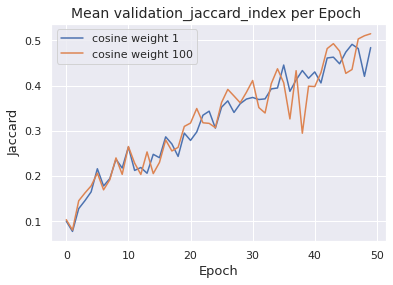

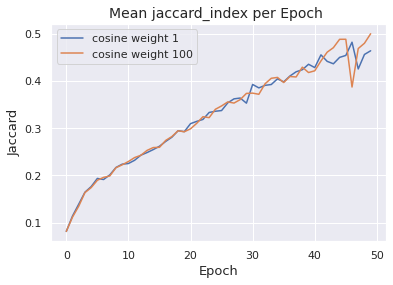

In [10]:
# RANO output Jaccard score for both training and validation - over differing penalty types
# RANO output loss for both training and validation - over differing penalty types

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["cosine weight 1", "cosine weight 100"]

output_type = ["validation_jaccard_index","jaccard_index"]
output_axis = ["Jaccard","Jaccard"]
output_title = ["validation_jaccard_index","jaccard_index"]
second_out = ["Validation_Jaccard","Training_Jaccard"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    ax = plt.subplot()
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=14)
    ax.legend(legend_names,fontsize=11)
    plt.xlabel("Epoch",fontsize=13)
    plt.ylabel(ylabel=output_axis[c],fontsize=13)
    plt.show()    

In [ ]:
# RANO predictions overlaying ground truth for 3 progressively higher quality examples

# RANO jaccard score of 0.73
image_1 = "Predictions_RANO_testnewtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_TCIA01_411_1/Slice_101_0.7368679430535101.png"
# RANO jaccard score of 0.54
image_2 = "Predictions_RANO_testnewtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_ABB_1/Slice_43_0.5464891041162228.png"
# RANO jaccard score of
image_3 = 

In [ ]:
# RANO predictions overlaying ground truth for 2 different models for qualitative output improvements - 2 examples

In [ ]:
# Segmentaiton training loss plot for 3 different models = RI, PFE, PTE

In [ ]:
# Segmentation training and validation dice score for 3 different models = RI, PFE, PTE

In [ ]:
# Segmentation qualitative outputs for RI and PTE examples


 Mean ['0.006', '0.004', '0.007', '0.005', '0.284', '0.513', '0.537', '0.541', '0.562', '0.536', '0.546', '0.533', '0.544', '0.537', '0.569', '0.577', '0.582', '0.599', '0.573', '0.599', '0.579', '0.605', '0.596', '0.616', '0.605', '0.604', '0.578', '0.596'] 
 Median ['0.000', '0.000', '0.000', '0.000', '0.152', '0.659', '0.704', '0.721', '0.738', '0.686', '0.708', '0.710', '0.721', '0.690', '0.756', '0.764', '0.775', '0.795', '0.774', '0.791', '0.767', '0.800', '0.794', '0.807', '0.808', '0.802', '0.774', '0.789'] 
 Std ['0.053', '0.043', '0.054', '0.046', '0.305', '0.371', '0.375', '0.379', '0.373', '0.371', '0.371', '0.387', '0.381', '0.376', '0.379', '0.373', '0.377', '0.376', '0.386', '0.376', '0.385', '0.378', '0.378', '0.372', '0.382', '0.377', '0.383', '0.378']


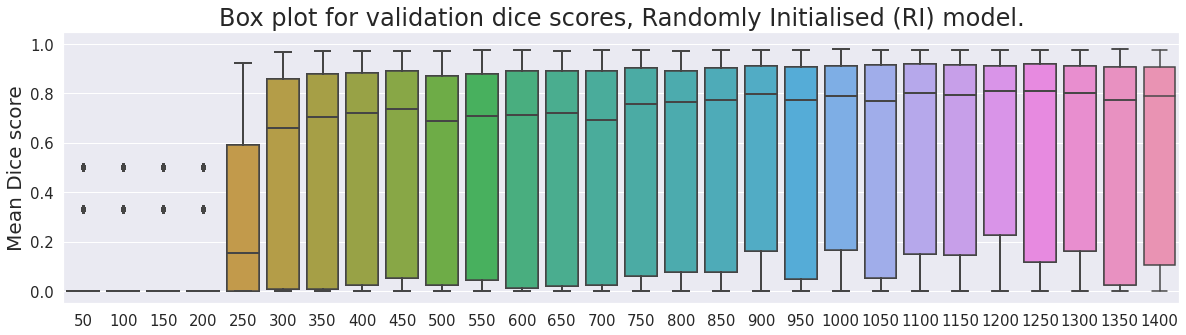


 Mean ['0.006', '0.004', '0.036', '0.517', '0.580', '0.595', '0.602', '0.611', '0.597', '0.597', '0.607', '0.613', '0.614', '0.609', '0.613', '0.612', '0.629', '0.624', '0.615', '0.625', '0.614', '0.635', '0.627', '0.630', '0.630', '0.619', '0.629', '0.625'] 
 Median ['0.000', '0.000', '0.000', '0.599', '0.740', '0.768', '0.779', '0.785', '0.769', '0.764', '0.776', '0.790', '0.797', '0.790', '0.798', '0.787', '0.806', '0.808', '0.791', '0.807', '0.796', '0.805', '0.810', '0.806', '0.812', '0.813', '0.813', '0.811'] 
 Std ['0.053', '0.043', '0.084', '0.335', '0.356', '0.363', '0.364', '0.363', '0.365', '0.360', '0.361', '0.364', '0.364', '0.364', '0.365', '0.362', '0.359', '0.364', '0.361', '0.363', '0.368', '0.354', '0.362', '0.356', '0.360', '0.370', '0.363', '0.366']


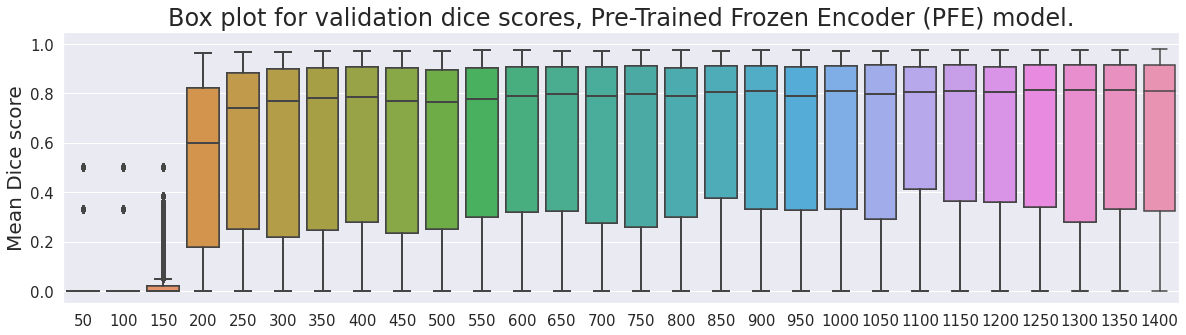


 Mean ['0.006', '0.004', '0.443', '0.589', '0.590', '0.611', '0.623', '0.618', '0.612', '0.609', '0.600', '0.625', '0.623', '0.625', '0.619', '0.623', '0.634', '0.630', '0.632', '0.635', '0.636', '0.651', '0.637', '0.630', '0.645', '0.644', '0.646', '0.635'] 
 Median ['0.000', '0.000', '0.462', '0.752', '0.756', '0.787', '0.799', '0.798', '0.788', '0.785', '0.783', '0.804', '0.805', '0.799', '0.801', '0.793', '0.814', '0.810', '0.809', '0.810', '0.818', '0.830', '0.821', '0.816', '0.827', '0.826', '0.828', '0.824'] 
 Std ['0.053', '0.043', '0.336', '0.357', '0.360', '0.358', '0.357', '0.359', '0.359', '0.360', '0.364', '0.357', '0.359', '0.355', '0.360', '0.356', '0.355', '0.359', '0.355', '0.352', '0.359', '0.351', '0.358', '0.364', '0.356', '0.355', '0.356', '0.364']


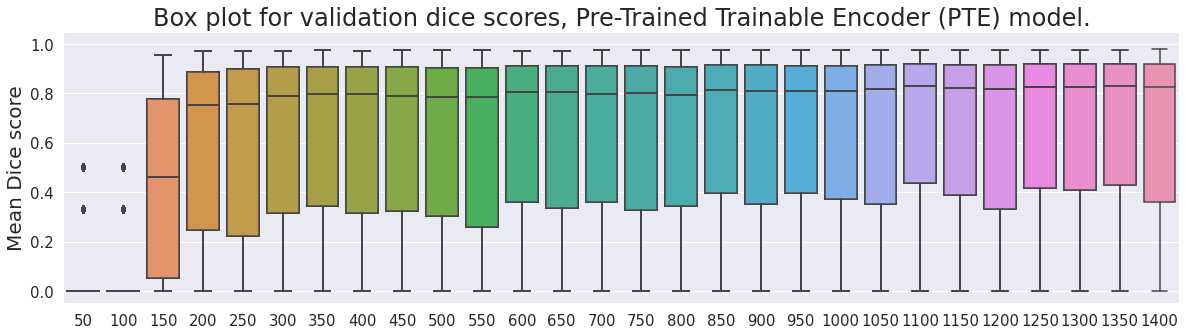

In [5]:
# Segmentation Boxplot progression for RO, PFE and PTE 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(font_scale = 1.35)

onevals = True

empty_data = []
base_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Base Model")
fr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Frozen Model")
unfr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Unfrozen Model")

fr_mean,unfr_mean,base_mean= [],[],[]
fr_med, unfr_med, base_med = [],[],[]
fr_std, unfr_std, base_std = [],[],[]

plt.figure(figsize=(20,5))

################################################################
#x = np.linspace(50, 900, num=18)
x = np.linspace(50, 1400, num=28)
x = x.tolist()

for i in range(len(x)):
    f = str(int(x[i])) 
    validation_dice_base = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_RI_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    base_dice = pd.DataFrame(data=validation_dice_base, columns=range(1)).assign(Data="Base Dice")
    
    if onevals == True:
        base_dice_2 = base_dice[base_dice[:] != 1.0]
        base_dice_frame = pd.DataFrame(data=base_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        base_dice_frame = pd.DataFrame(data=base_dice, columns=range(1)).assign(Data=str(int(x[i])))

    base_dice_frame_total = pd.concat([base_dice_frame_total,base_dice_frame])

    dice_output = pd.melt(base_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    base_mean.append(np.nanmean(base_dice_frame[0].to_numpy()))
    base_med.append(np.nanmedian(base_dice_frame[0].to_numpy()))
    base_std.append(np.nanstd(base_dice_frame[0].to_numpy()))

np.set_printoptions(precision=3)
print("\n",
      "Mean",['%.3f' % n for n in base_mean],"\n",
      "Median",['%.3f' % n for n in base_med],"\n",
      "Std",['%.3f' % n for n in base_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Randomly Initialised (RI) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")

plt.show()

plt.figure(figsize=(20,5))

##############################################################
x = np.linspace(50, 1400, num=28)
x = x.tolist()

# Incorrect filenames for the training dice are formatted as follows : 
# "Checkpoints/" + Param.SegNet.c_file + "epoch_" + "_" + str(cur_step) +  "_"+ str(epoch) + "training_dice.csv"
# we will want to output this soon but for the moment i will leae it here since the current example inthe UNet Main code is fixed.

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_fr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PFE_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    fr_dice = pd.DataFrame(data=validation_dice_fr, columns=range(1)).assign(Data="fr Dice")
    
    if onevals == True:
        fr_dice_2 = fr_dice[fr_dice[:] != 1.0]
        fr_dice_frame = pd.DataFrame(data=fr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        fr_dice_frame = pd.DataFrame(data=fr_dice, columns=range(1)).assign(Data=str(int(x[i])))

    fr_dice_frame_total = pd.concat([fr_dice_frame_total,fr_dice_frame])

    dice_output = pd.melt(fr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    fr_mean.append(np.nanmean(fr_dice_frame[0].to_numpy()))
    fr_med.append(np.nanmedian(fr_dice_frame[0].to_numpy()))
    fr_std.append(np.nanstd(fr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in fr_mean],"\n",
      "Median",['%.3f' % n for n in fr_med],"\n",
      "Std",['%.3f' % n for n in fr_std])    

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Pre-Trained Frozen Encoder (PFE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()

plt.figure(figsize=(20,5))

###############################################################
x = np.linspace(50, 1400, num=28)
x = x.tolist()
from matplotlib.cbook import boxplot_stats

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_unfr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")
    
    if onevals == True:
        unfr_dice_2 = unfr_dice[unfr_dice[:] != 1.0]
        unfr_dice_frame = pd.DataFrame(data=unfr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        unfr_dice_frame = pd.DataFrame(data=unfr_dice, columns=range(1)).assign(Data=str(int(x[i])))

    unfr_dice_frame_total = pd.concat([unfr_dice_frame_total,unfr_dice_frame])

    dice_output = pd.melt(unfr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)

#     outliers = boxplot_stats(dice_output.value).pop(0)['fliers']
#     print(np.nanmean(outliers))
#     print(len(outliers))
    
    unfr_mean.append(np.nanmean(unfr_dice_frame[0].to_numpy()))
    unfr_med.append(np.nanmedian(unfr_dice_frame[0].to_numpy()))
    unfr_std.append(np.nanstd(unfr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in unfr_mean],"\n",
      "Median",['%.3f' % n for n in unfr_med],"\n",
      "Std",['%.3f' % n for n in unfr_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()
# ########################################


# validation_dice_unfr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_v2/epoch_0_"+ str(int(x[-1])) +"_validation_dice.csv",delimiter=',')
# unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")

# dice_output = pd.melt(unfr_dice, id_vars=['Data'])
# ax = sns.boxplot(x="Data", y="value", data=dice_output)
# plt.ylim([-0.05,1.05])
# plt.title("Box plot for validation dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
# plt.ylabel("Mean Dice score",fontsize=20)
# plt.xlabel("")
# plt.show()
# outliers = boxplot_stats(dice_output.value).pop(0)['fliers']
# print(np.nanmean(outliers))
# print(len(outliers), "/", len(dice_output))


# sns.violinplot(data=outliers)
# plt.show()



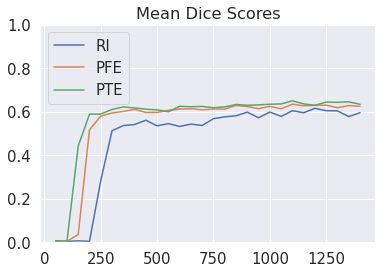

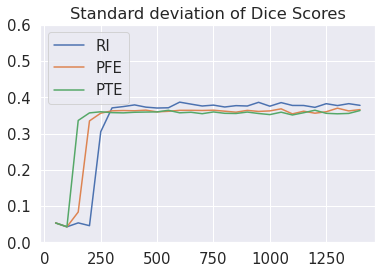

In [8]:
plt.plot(x,base_mean)
plt.plot(x,fr_mean)
plt.plot(x,unfr_mean)
plt.legend(["RI","PFE","PTE"])
plt.title("Mean Dice Scores")
plt.ylim(0,1)
plt.show()

plt.plot(x,base_std)
plt.plot(x,fr_std)
plt.plot(x,unfr_std)
plt.legend(["RI","PFE","PTE"])
plt.title("Standard deviation of Dice Scores")
plt.ylim(0,0.6)
plt.show()


 Mean ['0.004', '0.004', '0.003', '0.004', '0.014', '0.103', '0.183', '0.233', '0.275', '0.311', '0.341', '0.364', '0.382', '0.397', '0.411', '0.424', '0.436', '0.447', '0.458', '0.466', '0.470', '0.478'] 
 Median ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.003', '0.026', '0.138', '0.298', '0.389', '0.483', '0.518', '0.572', '0.601', '0.616', '0.639'] 
 Std ['0.040', '0.040', '0.036', '0.042', '0.082', '0.262', '0.339', '0.369', '0.387', '0.400', '0.408', '0.412', '0.414', '0.415', '0.416', '0.417', '0.418', '0.418', '0.418', '0.418', '0.417', '0.417']


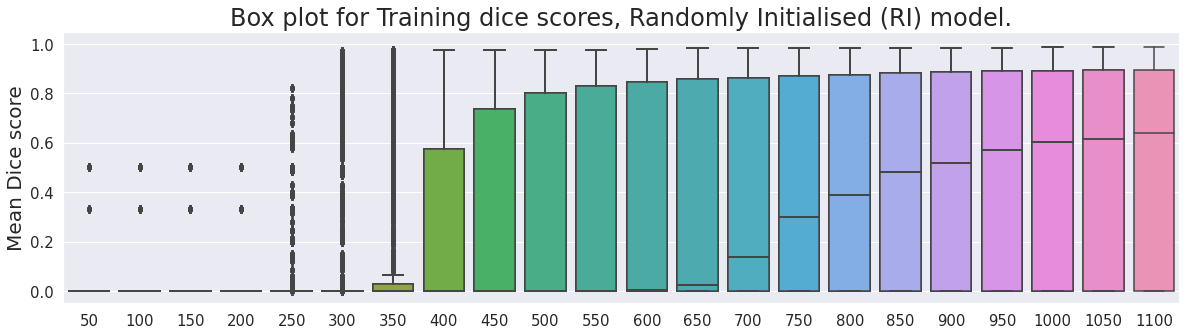


 Mean ['0.004', '0.004', '0.004', '0.134', '0.233', '0.298', '0.354', '0.391', '0.420', '0.444', '0.467', '0.482', '0.497', '0.508', '0.518', '0.528', '0.536', '0.545', '0.552', '0.559', '0.562', '0.566'] 
 Median ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.005', '0.074', '0.333', '0.500', '0.627', '0.673', '0.702', '0.723', '0.738', '0.752', '0.760', '0.771', '0.778', '0.785', '0.787', '0.793'] 
 Std ['0.040', '0.040', '0.040', '0.294', '0.365', '0.392', '0.410', '0.416', '0.418', '0.419', '0.418', '0.417', '0.416', '0.415', '0.413', '0.411', '0.410', '0.409', '0.407', '0.405', '0.403', '0.403']


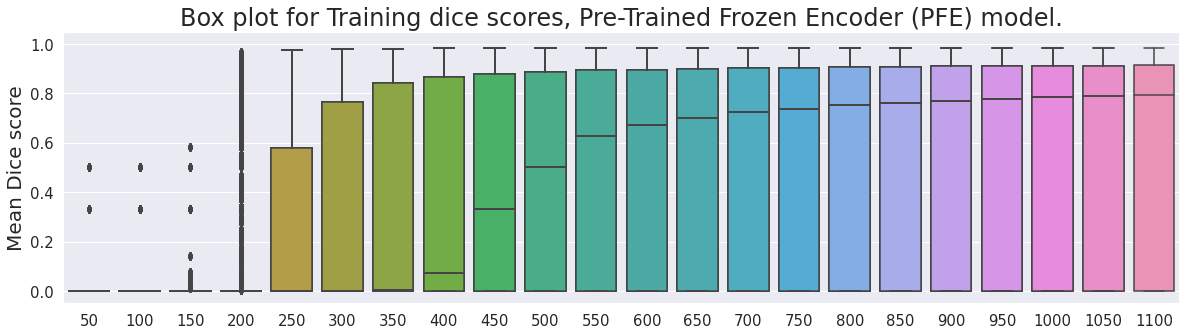


 Mean ['0.004', '0.004', '0.033', '0.190', '0.278', '0.338', '0.389', '0.423', '0.450', '0.471', '0.491', '0.505', '0.518', '0.529', '0.539', '0.549', '0.557', '0.564', '0.571', '0.577', '0.580', '0.585'] 
 Median ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.051', '0.356', '0.527', '0.630', '0.690', '0.720', '0.737', '0.753', '0.765', '0.776', '0.784', '0.792', '0.798', '0.804', '0.806', '0.811'] 
 Std ['0.040', '0.040', '0.137', '0.341', '0.386', '0.404', '0.416', '0.419', '0.419', '0.418', '0.417', '0.415', '0.412', '0.411', '0.408', '0.406', '0.404', '0.403', '0.401', '0.399', '0.397', '0.396']


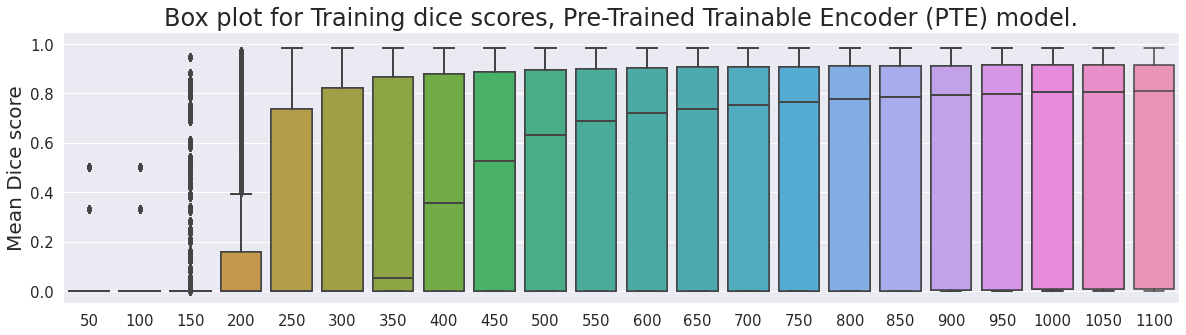

In [9]:
# Segmentation Boxplot progression for RO, PFE and PTE - training - without values that == 1.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

onevals = True

sns.set(font_scale = 1.35)

empty_data = []
base_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Base Model")
fr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Frozen Model")
unfr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Unfrozen Model")

fr_mean,unfr_mean,base_mean= [],[],[]
fr_med, unfr_med, base_med = [],[],[]
fr_std, unfr_std, base_std = [],[],[]

plt.figure(figsize=(20,5))

################################################################
#x = np.linspace(50, 900, num=18)
x = np.linspace(50, 1100, num=22)
x = x.tolist()

for i in range(len(x)):
    f = str(int(x[i])) 

    validation_dice_base = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_RI_CO100_R3_v2/epoch_" + "_" + f +  "_0training_dice.csv",delimiter=',')
    base_dice = pd.DataFrame(data=validation_dice_base, columns=range(1)).assign(Data="Base Dice")
    
    if onevals == True:
        base_dice_2 = base_dice[base_dice[:] != 1.0]
        base_dice_frame = pd.DataFrame(data=base_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        base_dice_frame = pd.DataFrame(data=base_dice, columns=range(1)).assign(Data=str(int(x[i])))

    base_dice_frame_total = pd.concat([base_dice_frame_total,base_dice_frame])
    
    dice_output = pd.melt(base_dice_frame_total, id_vars=['Data'])
    
    # print(dice_output.columns)

    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    base_mean.append(np.nanmean(base_dice_frame[0].to_numpy()))
    base_med.append(np.nanmedian(base_dice_frame[0].to_numpy()))
    base_std.append(np.nanstd(base_dice_frame[0].to_numpy()))

np.set_printoptions(precision=3)
print("\n",
      "Mean",['%.3f' % n for n in base_mean],"\n",
      "Median",['%.3f' % n for n in base_med],"\n",
      "Std",['%.3f' % n for n in base_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for Training dice scores, Randomly Initialised (RI) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")

plt.show()



plt.figure(figsize=(20,5))

##############################################################
x = np.linspace(50, 1100, num=22)
x = x.tolist()

# Incorrect filenames for the training dice are formatted as follows : 
# "Checkpoints/" + Param.SegNet.c_file + "epoch_" + "_" + str(cur_step) +  "_"+ str(epoch) + "training_dice.csv"
# we will want to output this soon but for the moment i will leae it here since the current example inthe UNet Main code is fixed.

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_fr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PFE_CO100_R3_v2/epoch_" + "_" + f +  "_0training_dice.csv",delimiter=',')
    #validation_dice_fr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PFE_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    fr_dice = pd.DataFrame(data=validation_dice_fr, columns=range(1)).assign(Data="fr Dice")
    if onevals == True:
        fr_dice_2 = fr_dice[fr_dice[:] != 1.0]
        fr_dice_frame = pd.DataFrame(data=fr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        fr_dice_frame = pd.DataFrame(data=fr_dice, columns=range(1)).assign(Data=str(int(x[i])))
        
    fr_dice_frame_total = pd.concat([fr_dice_frame_total,fr_dice_frame])

    dice_output = pd.melt(fr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    fr_mean.append(np.nanmean(fr_dice_frame[0].to_numpy()))
    fr_med.append(np.nanmedian(fr_dice_frame[0].to_numpy()))
    fr_std.append(np.nanstd(fr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in fr_mean],"\n",
      "Median",['%.3f' % n for n in fr_med],"\n",
      "Std",['%.3f' % n for n in fr_std])    

plt.ylim([-0.05,1.05])
plt.title("Box plot for Training dice scores, Pre-Trained Frozen Encoder (PFE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()

plt.figure(figsize=(20,5))

###############################################################
x = np.linspace(50, 1100, num=22)
x = x.tolist()
from matplotlib.cbook import boxplot_stats

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_unfr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_v2/epoch_" + "_" + f +  "_0training_dice.csv",delimiter=',')
    unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")
#     unfr_dice = unfr_dice[unfr_dice.values != 1]
    if onevals == True:
        unfr_dice_2 = unfr_dice[unfr_dice[:] != 1.0]
        unfr_dice_frame = pd.DataFrame(data=unfr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
    else:
        unfr_dice_frame = pd.DataFrame(data=unfr_dice, columns=range(1)).assign(Data=str(int(x[i])))
    unfr_dice_frame_total = pd.concat([unfr_dice_frame_total,unfr_dice_frame])

    dice_output = pd.melt(unfr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)

#     outliers = boxplot_stats(dice_output.value).pop(0)['fliers']
#     print(np.nanmean(outliers))
#     print(len(outliers))
    
    unfr_mean.append(np.nanmean(unfr_dice_frame[0].to_numpy()))
    unfr_med.append(np.nanmedian(unfr_dice_frame[0].to_numpy()))
    unfr_std.append(np.nanstd(unfr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in unfr_mean],"\n",
      "Median",['%.3f' % n for n in unfr_med],"\n",
      "Std",['%.3f' % n for n in unfr_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for Training dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()


# ########################################


# validation_dice_unfr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_v2/epoch_0_"+ str(int(x[-1])) +"_validation_dice.csv",delimiter=',')
# unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")

# dice_output = pd.melt(unfr_dice, id_vars=['Data'])
# ax = sns.boxplot(x="Data", y="value", data=dice_output)
# plt.ylim([-0.05,1.05])
# plt.title("Box plot for validation dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
# plt.ylabel("Mean Dice score",fontsize=20)
# plt.xlabel("")
# plt.show()
# outliers = boxplot_stats(dice_output.value).pop(0)['fliers']
# print(np.nanmean(outliers))
# print(len(outliers), "/", len(dice_output))


# sns.violinplot(data=outliers)
# plt.show()



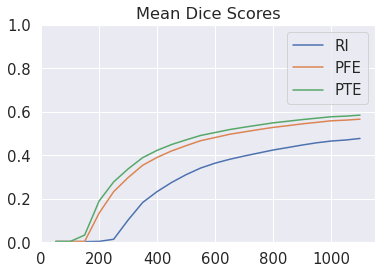

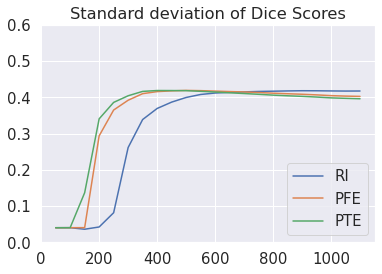

In [10]:
plt.plot(x,base_mean)
plt.plot(x,fr_mean)
plt.plot(x,unfr_mean)
plt.legend(["RI","PFE","PTE"])
plt.title("Mean Dice Scores")
plt.ylim(0,1)
plt.show()

plt.plot(x,base_std)
plt.plot(x,fr_std)
plt.plot(x,unfr_std)
plt.legend(["RI","PFE","PTE"])
plt.title("Standard deviation of Dice Scores")
plt.ylim(0,0.6)
plt.show()

In [13]:
# Segmentation outputs for differeing training data size amounts
i = "/HGG/Item"
print(i[:4])

/HGG
